<a href="https://colab.research.google.com/github/matinmazid/York_ML_certificate/blob/master/project2_individual/financial_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to classify records as one category or an other of financial tweets. The goal here is to help users to quickly sort through their tweets to help them find relevant financial data.
We can uncomment as necessary

In [51]:
!pip install xgboost
#!conda install -c conda-forge py-xgboost-cpu
#!conda install -c conda-forge py-xgboost-gpu

In [1]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The goal here is to categorize tweets to help users quickly sort thought the influx of information in their twitter feed.

This corpus already comes classifed with integers, where
"0": "Analyst Update",
"1": "Fed | Central Banks",
"2": "Company | Product News",
"3": "Treasuries | Corporate Debt",
"4": "Dividend",
"5": "Earnings",
"6": "Energy | Oil",
"7": "Financials",
"8": "Currencies",
"9": "General News | Opinion",
"10": "Gold | Metals | Materials",
"11": "IPO",
"12": "Legal | Regulation",
"13": "M&A | Investments",
"14": "Macro",
"15": "Markets",
"16": "Politics",
"17": "Personnel Change",
"18": "Stock Commentary",
"19": "Stock Movement"

In [12]:
# https://www.kaggle.com/code/ahmadalijamali/twitter-financial-news-nlp-analysis-and-prediction/notebook
import pandas as pd

#df=pd.read_csv("./data/train_data.csv")
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ml_200_individual/train_data.csv")

CATEGORY_LOOKUP={
    0: "Analyst Update",
    1: "Fed | Central Banks",
    2: "Company | Product News",
    3: "Treasuries | Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy | Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News | Opinion",
    10: "Gold | Metals | Materials",
    11: "IPO",
    12: "Legal | Regulation",
    13: "M&A | Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

In [60]:
df.head()

,text,label,text_label,cleaned_text
0,"Here are Thursday's biggest analyst calls: Apple, Amazon, Tesla, Palantir, DocuSign, Exxon &amp; more https://t.co/QPN8Gwl7Uh",0,Analyst Update,thursdays biggest analyst calls apple amazon tesla palantir docusign exxon
1,"Buy Las Vegas Sands as travel to Singapore builds, Wells Fargo says https://t.co/fLS2w57iCz",0,Analyst Update,buy las vegas sands travel singapore builds wells fargo says
2,"Piper Sandler downgrades DocuSign to sell, citing elevated risks amid CEO transition https://t.co/1EmtywmYpr",0,Analyst Update,piper sandler downgrades docusign sell citing elevated risks amid ceo transition
3,"Analysts react to Tesla's latest earnings, break down what's next for electric car maker https://t.co/kwhoE6W06u",0,Analyst Update,analysts react teslas latest earnings break whats next electric car maker
4,"Netflix and its peers are set for a ‘return to growth,’ analysts say, giving one stock 120% upside https://t.co/jPpdl0D9s4",0,Analyst Update,netflix peers set return growth analysts say giving one stock 120 percent upside


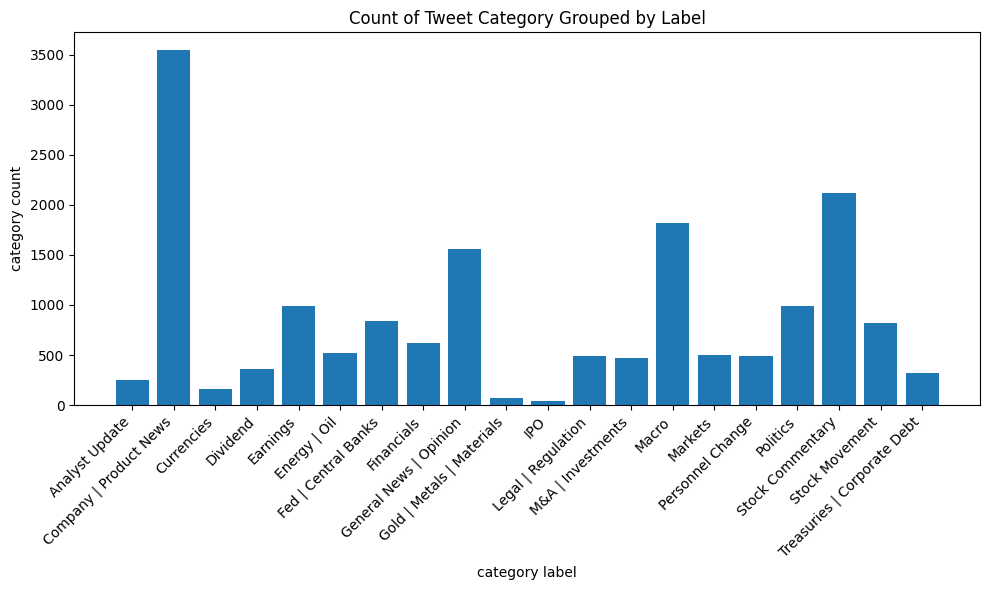

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#create a text_label field
df["text_label"]=df["label"].apply(lambda x: CATEGORY_LOOKUP[x])
label_text_counts_series=df.groupby("text_label")["text"].count()

groupbyDF=pd.DataFrame(label_text_counts_series)

groupbyDF.rename(columns={"text":"count"},inplace=True)
groupbyDF.reset_index(inplace=True)

# #Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(groupbyDF['text_label'], groupbyDF['count'])

plt.xlabel("category label")
plt.ylabel("category count")
plt.title("Count of Tweet Category Grouped by Label")
plt.xticks(range(len(groupbyDF['text_label'])), groupbyDF['text_label'], rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()





In [23]:
pd.set_option('display.max_colwidth', None)
df.groupby("text_label").sample(1)


,text,label,text_label
17,"Tesla's bitcoin holdings could result in a $460 million hit for the carmaker, Barclays says https://t.co/J50bSXAsf6",0,Analyst Update
2443,Coronavirus Update: Protein-based vaccine’s OK fails to boost Novavax stock https://t.co/lQPaFlwOur,2,Company | Product News
3960,The Euro is edging closer toward parity with the US dollar as energy concerns and the risk of recession weigh on the outlook for the euro area https://t.co/0rC7biTHnC,8,Currencies
4258,$KBH - KB Home declares $0.15 dividend https://t.co/oIiYoaSn53,4,Dividend
4417,"Acushnet Holdings Corp. to Announce Second Quarter 2022 Financial Results on August 4, 2022 https://t.co/Ouujhmo10O",5,Earnings
5612,"German Energy Regulator Says #Gazprom Has Renominated Gas Flows, Seen At 30% Capacity On July 21st - Further Changes Are Possible To NS1 Gas Flow Nominations #LNG",6,Energy | Oil
6319,ECB policymakers to discuss 50 bps rate hike this week RTRS https://t.co/rPjyVqGIeB,1,Fed | Central Banks
6974,"$EFX - Equifax Non-GAAP EPS of $2.09 beats by $0.07, revenue of $1.32B in-line https://t.co/mBTWT31uEV",7,Financials
8484,"Markets will continue to oscillate between interest rate and credit risk until they see evidence on three key economic and policy questions, @elerianm says https://t.co/CF6kfWTyWO",9,General News | Opinion
8913,"Gold dipped after rallying in the wake of a searing inflation report from the US, as investors again turned to the greenback as a haven asset https://t.co/nrZwyIdfsZ via @markets",10,Gold | Metals | Materials


Here we see that there are dollars signs and urls

Clen up date
change % to percent </br>
change html ecape '&amp'; '&lt'; '&gt'; and, less than, greater than respectively </br>
change &, <, > as above

We also want to remove any other non ascii character after translating the above.

we want to use a standard list of stop words


In [61]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

stopword_list = nltk.corpus.stopwords.words("english")

# there is no  symantic information in a url on its own
# we'd have to get the url's content but there are also paywall issues.
# we also want to compile this regex outside of any loops
myUrlFinder=re.compile(r'(.*)(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)(.*)')



def clean_text(text):
    text = text.replace("%", " percent ")
    text = text.replace("&amp;", " and ")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace("<", " less than ")
    text = text.replace(">", " greater than ")
    # the $ is abmigous, sometimes its related to a symbol, sometimes its related
    # to a dollar amount.
    text = text.replace("$", "")
    #remove non ascii char


    matches=myUrlFinder.match(text)
    # put the string back together
    while matches:
      text=matches.group(1)+" "+matches.group(3)
      matches=myUrlFinder.match(text)


    text= re.sub(r"[^A-Za-z0-9 ]","",text,flags=re.IGNORECASE)
    text=text.lower()
    tokenizer=ToktokTokenizer()
    tokens=tokenizer.tokenize(text)
    tokens=[word for word in tokens if word not in stopword_list]
    text=" ".join(tokens)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df["cleaned_text"]=df["text"].apply(clean_text)

In [63]:
df.groupby("text_label").sample(1,random_state=100)

,text,label,text_label,cleaned_text
115,"$INTC - Susquehanna cautious on Intel going into Q2, citing 'deteriorating PC demand' https://t.co/gM2iS1DUCJ",0,Analyst Update,intc susquehanna cautious intel going q2 citing deteriorating pc demand
2194,New Lamps Plus Store-Based Customer Care Team Allows Certified Professional Sales Agents to Assist both Pro Industry Clientele and Store Customers https://t.co/VhieLGyd1x https://t.co/ui7jvFa3p7,2,Company | Product News,new lamps plus storebased customer care team allows certified professional sales agents assist pro industry clientele store customers
3893,PBoC Sets Yuan Mid-Point At 6.7287 / Dlr VS Last Close 6.7140,8,Currencies,pboc sets yuan midpoint 67287 dlr vs last close 67140
4204,$BSCE - Invesco BulletShares 2023 USD Emerging Markets Debt ETF declares monthly distribution of $0.0458 https://t.co/OAberGJnwv,4,Dividend,bsce invesco bulletshares 2023 usd emerging markets debt etf declares monthly distribution 00458
4927,$DFS - Discover Financial Services Q2 2022 Earnings Preview https://t.co/Guh1DSwcci,5,Earnings,dfs discover financial services q2 2022 earnings preview
5384,Copper rout worsens as recession fears hammer commodities markets https://t.co/bRIUzyr8c1,6,Energy | Oil,copper rout worsens recession fears hammer commodities markets
6352,"Traders See 175Bps BoE Hikes By Year-End, First Time In Three Weeks",1,Fed | Central Banks,traders see 175bps boe hikes yearend first time three weeks
6863,"Netflix lost 970,000 subscribers in Q2, beating Wall Street estimates by over 1 million https://t.co/bJWp7aZVn4",7,Financials,netflix lost 970000 subscribers q2 beating wall street estimates 1 million
7670,Jennifer Lopez and Ben Affleck were wed Saturday in a late-night Las Vegas drive-through chapel https://t.co/f4JLwCUVoO,9,General News | Opinion,jennifer lopez ben affleck wed saturday latenight las vegas drivethrough chapel
8865,$COMDX: Metals Settlement Prices https://t.co/3Xii3Fx8cW,10,Gold | Metals | Materials,comdx metals settlement prices


In [65]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
texts_train, texts_test, labels_train, labels_test = train_test_split(df["cleaned_text"], df["label"], test_size=0.2, random_state=42)

In [69]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [71]:
# Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(X_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
texts_train.head()
labels_train.loc[12164]

15

In [74]:
#us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector -> markets
model.predict(vectorizer.transform(["us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector"]))

array([15])

The overall accruacy isnt very good. We should look at how we can tune this model

In [75]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.58%


Lets take a closer look at what our problems are

In [ ]:

from sklearn.metrics import confusion_matrix